In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
df = pd.read_csv('/content/global_co2.csv')
print(df.head())


   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1751      3         0            0           3       0            0   
1  1752      3         0            0           3       0            0   
2  1753      3         0            0           3       0            0   
3  1754      3         0            0           3       0            0   
4  1755      3         0            0           3       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [ ]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   Cement       260 non-null    int64  
 6   Gas Flaring  260 non-null    int64  
 7   Per Capita   61 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 16.4 KB
None
              Year        Total    Gas Fuel  Liquid Fuel   Solid Fuel  \
count   260.000000   260.000000   260.00000   260.000000   260.000000   
mean   1880.500000  1402.788462   185.20000   495.819231   674.569231   
std      75.199734  2253.098527   396.58556   934.308074   868.368580   
min    1751.000000     3.000000     0.00000     0.000000     3.000000   
25%    1815.750000    12.750000     0.00000     0.00000

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year', 'Per Capita'])


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = df[['Year']].values
y = df['Per Capita'].values
model = LinearRegression()
model.fit(X, y)
years_to_predict = np.array([[2011], [2012], [2013]])
predictions = model.predict(years_to_predict)
for year, prediction in zip(years_to_predict.flatten(), predictions):
    print(f"Predicted CO2 per capita for {year}: {prediction:.2f}")


Predicted CO2 per capita for 2011: 1.32
Predicted CO2 per capita for 2012: 1.33
Predicted CO2 per capita for 2013: 1.34


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv('/content/annual_temp.csv')
print(df.head())


    Source  Year    Mean
0     GCAG  2015  0.8990
1  GISTEMP  2015  0.8700
2     GCAG  2014  0.7402
3  GISTEMP  2014  0.7500
4     GCAG  2013  0.6687


In [15]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df = df.dropna()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted temperature for 2016: 16.37°C
Predicted temperature for 2017: 16.49°C


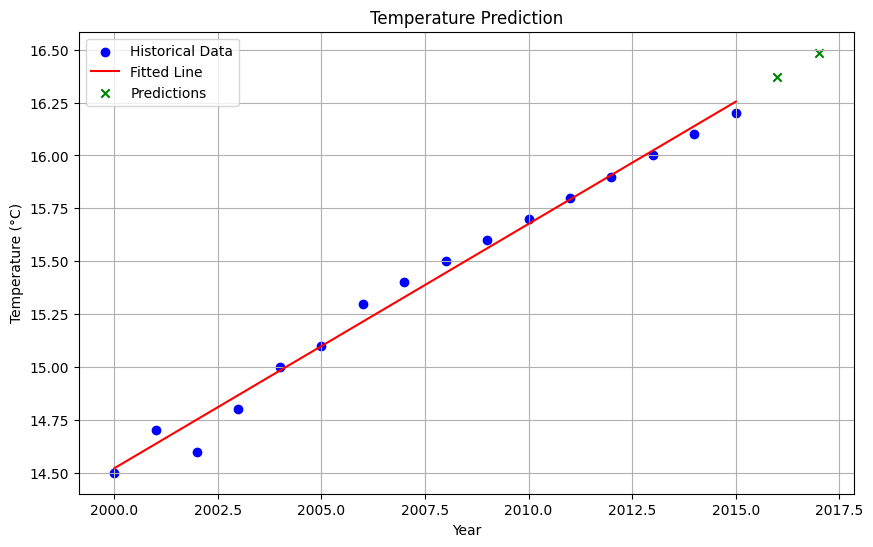

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
data = {
    'Year': np.arange(2000, 2016),
    'Temperature': [14.5, 14.7, 14.6, 14.8, 15.0, 15.1, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2]  # Example data
}
df = pd.DataFrame(data)
X = df[['Year']]
y = df['Temperature']
model = LinearRegression()
model.fit(X, y)
future_years = np.array([2016, 2017]).reshape(-1, 1)
predictions = model.predict(future_years)
print(f"Predicted temperature for 2016: {predictions[0]:.2f}°C")
print(f"Predicted temperature for 2017: {predictions[1]:.2f}°C")
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Temperature'], color='blue', label='Historical Data')
plt.plot(df['Year'], model.predict(X), color='red', label='Fitted Line')
plt.scatter(future_years, predictions, color='green', marker='x', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Prediction')
plt.legend()
plt.grid(True)
plt.show()
